In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from scipy.integrate import solve_ivp

In [12]:
k = 2  # N/m
m = 4  # kg
c = 1  # Ns/m

x0 = 1  # m
v0 = 0  # m/s
freq = 0.5  # Hz

$$
m\ddot{x} = -kx - c\dot{x} + \cos(2\pi ft)
$$
Then
$$
v = \dot{x} \\
\dot{v} = -kx/m - cv/m + \cos(2\pi ft)/m
$$

In [13]:
def f(t, r):
    x, v = r
    fx = v
    fv = (1/m)*(-k*x - c*v + np.cos(2 * np.pi * freq * t))
    return np.array([fx, fv])

In [30]:
t0 = 0
t1 = 80
N = 500
t, dt = np.linspace(t0, t1, N, retstep=True)

In [31]:
sol = solve_ivp(
    fun = f, 
    t_span = [t0, t1],
    y0     = [x0, v0],
    t_eval = t
)
print(sol.message)

The solver successfully reached the end of the integration interval.


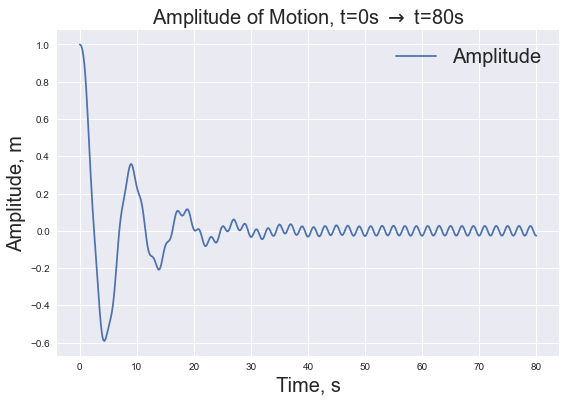

In [43]:
plt.figure(figsize=(9,6))
plt.plot(sol.t, sol.y[0], label=r"Amplitude")
plt.title(r"Amplitude of Motion, t=0s $\rightarrow$ t=80s", fontsize=20)
plt.xlabel("Time, s",fontsize=20)
plt.ylabel("Amplitude, m",fontsize=20)
plt.legend(fontsize=20)
plt.show()
plt.close()

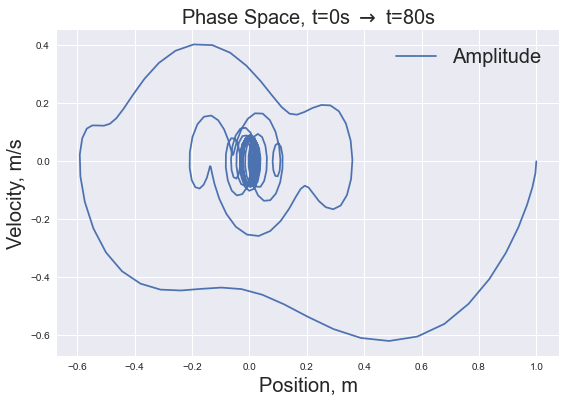

In [44]:
plt.figure(figsize=(9,6))
plt.plot(sol.y[0], sol.y[1], label=r"Amplitude")
plt.title(r"Phase Space, t=0s $\rightarrow$ t=80s", fontsize=20)
plt.xlabel("Position, m",fontsize=20)
plt.ylabel("Velocity, m/s",fontsize=20)
plt.legend(fontsize=20)
plt.show()
plt.close()